<a href="https://colab.research.google.com/github/tinybeachthor/ucboulder-ml-supervised/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data

In [2]:
!wget https://raw.githubusercontent.com/tinybeachthor/ucboulder-ml-supervised/main/data/billboard_2010s.csv

--2024-04-18 21:38:15--  https://raw.githubusercontent.com/tinybeachthor/ucboulder-ml-supervised/main/data/billboard_2010s.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 825815 (806K) [text/plain]
Saving to: ‘billboard_2010s.csv’

billboard_2010s.csv 100%[===================>] 806.46K  --.-KB/s    in 0.05s   

2024-04-18 21:38:16 (17.3 MB/s) - ‘billboard_2010s.csv’ saved [825815/825815]



In [7]:
df = pd.read_csv('billboard_2010s.csv')
df = df.dropna()
print(df.shape)
print(df.columns)
df.head()

(4425, 22)
Index(['song_id', 'song', 'performer', 'first_week_on_chart',
       'last_week_on_chart', 'weeks_on_chart', 'highest_position',
       'lowest_position', 'spotify_track_duration_ms',
       'spotify_track_explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')


,song_id,song,performer,first_week_on_chart,last_week_on_chart,weeks_on_chart,highest_position,lowest_position,spotify_track_duration_ms,spotify_track_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,#BeautifulMariah Carey Featuring Miguel,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,2013-09-07,16,15,95,199866.0,False,...,4.0,-5.405,1.0,0.0391,0.34600,0.000000,0.3470,0.469,107.042,4.0
1,#SELFIEThe Chainsmokers,#SELFIE,The Chainsmokers,2014-03-15,2014-05-24,11,16,95,183750.0,False,...,0.0,-3.282,1.0,0.2260,0.01340,0.000012,0.0787,0.651,127.973,4.0
2,#thatPOWERwill.i.am Featuring Justin Bieber,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,2013-07-20,16,17,85,279506.0,False,...,6.0,-6.096,0.0,0.0583,0.00112,0.000077,0.0748,0.403,128.000,4.0
3,$ave Dat MoneyLil Dicky Featuring Fetty Wap & ...,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,2015-10-10,2016-03-19,19,71,100,290835.0,True,...,2.0,-5.361,1.0,0.2300,0.11400,0.000000,0.2240,0.364,98.012,4.0
4,'Til Summer Comes AroundKeith Urban,'Til Summer Comes Around,Keith Urban,2010-01-30,2010-05-15,16,58,94,331466.0,False,...,9.0,-7.608,0.0,0.0331,0.59300,0.000136,0.7700,0.308,127.907,4.0


In [54]:
target = 'highest_position'
X = df.drop(columns=[target])
y = df[target]

train, test, X_train, X_test, y_train, y_test = train_test_split(df, X, y, test_size=0.25)

print(X_train.shape, y_train.shape)

nonfeatures = ['song_id', 'song', 'performer']
features = list(filter(lambda x: x not in nonfeatures, X_train.columns))
features_numeric = list(X_train.select_dtypes(include=['int', 'float']).columns)

print(features)
print(features_numeric)

(3318, 21) (3318,)
['first_week_on_chart', 'last_week_on_chart', 'weeks_on_chart', 'lowest_position', 'spotify_track_duration_ms', 'spotify_track_explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
['weeks_on_chart', 'lowest_position', 'spotify_track_duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


## Explore

In [56]:
train[features_numeric + [target]].corr()

,weeks_on_chart,lowest_position,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,highest_position
weeks_on_chart,1.000000,-0.056889,0.028583,0.060956,0.068635,0.007999,0.077198,0.056736,-0.124226,-0.093832,-0.033511,-0.047610,0.117339,-0.036635,0.036788,-0.710960
lowest_position,-0.056889,1.000000,0.006507,-0.014534,0.112406,0.001131,0.108317,0.040366,-0.009361,-0.089416,-0.000040,-0.001779,0.016751,0.018154,0.024992,0.358410
spotify_track_duration_ms,0.028583,0.006507,1.000000,-0.155508,0.012948,0.019066,-0.003903,0.001951,-0.031664,-0.041604,0.012154,0.017100,-0.177436,-0.012011,-0.010086,-0.016575
danceability,0.060956,-0.014534,-0.155508,1.000000,-0.026262,-0.012020,-0.008736,-0.109052,0.258866,-0.190714,-0.012127,-0.054813,0.270933,-0.116031,0.119146,-0.082391
energy,0.068635,0.112406,0.012948,-0.026262,1.000000,0.030669,0.739216,-0.000617,-0.035977,-0.554498,-0.070082,0.175188,0.445621,0.129403,0.136668,-0.015773
key,0.007999,0.001131,0.019066,-0.012020,0.030669,1.000000,0.014246,-0.156535,0.046969,-0.019167,0.003096,0.021065,0.044372,-0.030962,0.009938,-0.003163
loudness,0.077198,0.108317,-0.003903,-0.008736,0.739216,0.014246,1.000000,-0.007095,-0.094612,-0.426422,-0.150037,0.096553,0.290713,0.086126,0.077130,-0.028449
mode,0.056736,0.040366,0.001951,-0.109052,-0.000617,-0.156535,-0.007095,1.000000,-0.122994,0.029783,-0.016904,-0.036898,-0.007185,0.034938,-0.024087,-0.005716
speechiness,-0.124226,-0.009361,-0.031664,0.258866,-0.035977,0.046969,-0.094612,-0.122994,1.000000,-0.057424,-0.031762,0.082936,0.019862,0.102859,0.094689,0.041772
acousticness,-0.093832,-0.089416,-0.041604,-0.190714,-0.554498,-0.019167,-0.426422,0.029783,-0.057424,1.000000,0.061614,-0.100153,-0.174999,-0.099722,-0.124899,0.053618


<Axes: >

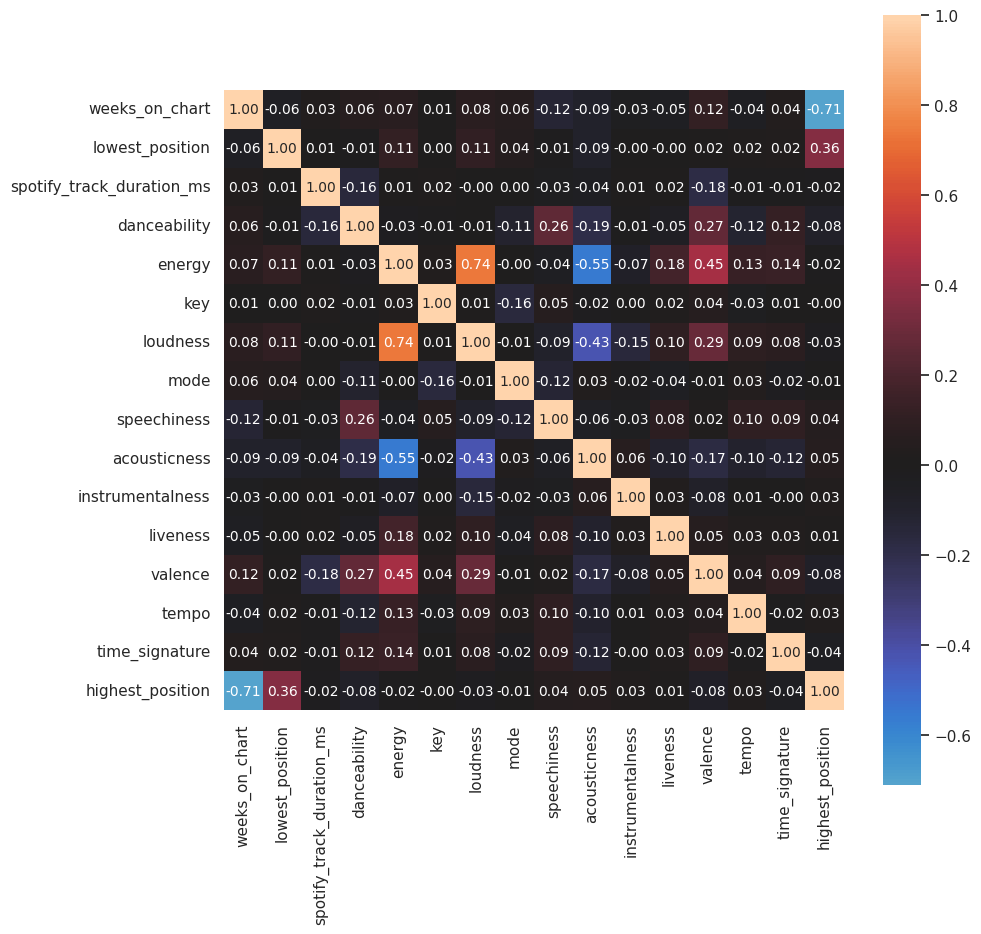

In [57]:
plt.figure(figsize = (10,10))
sns.heatmap(train[features_numeric + [target]].corr(),
            annot=True, square=True, center=0.0, fmt=".2f", annot_kws={"size": 10})

<Figure size 1000x1000 with 0 Axes>

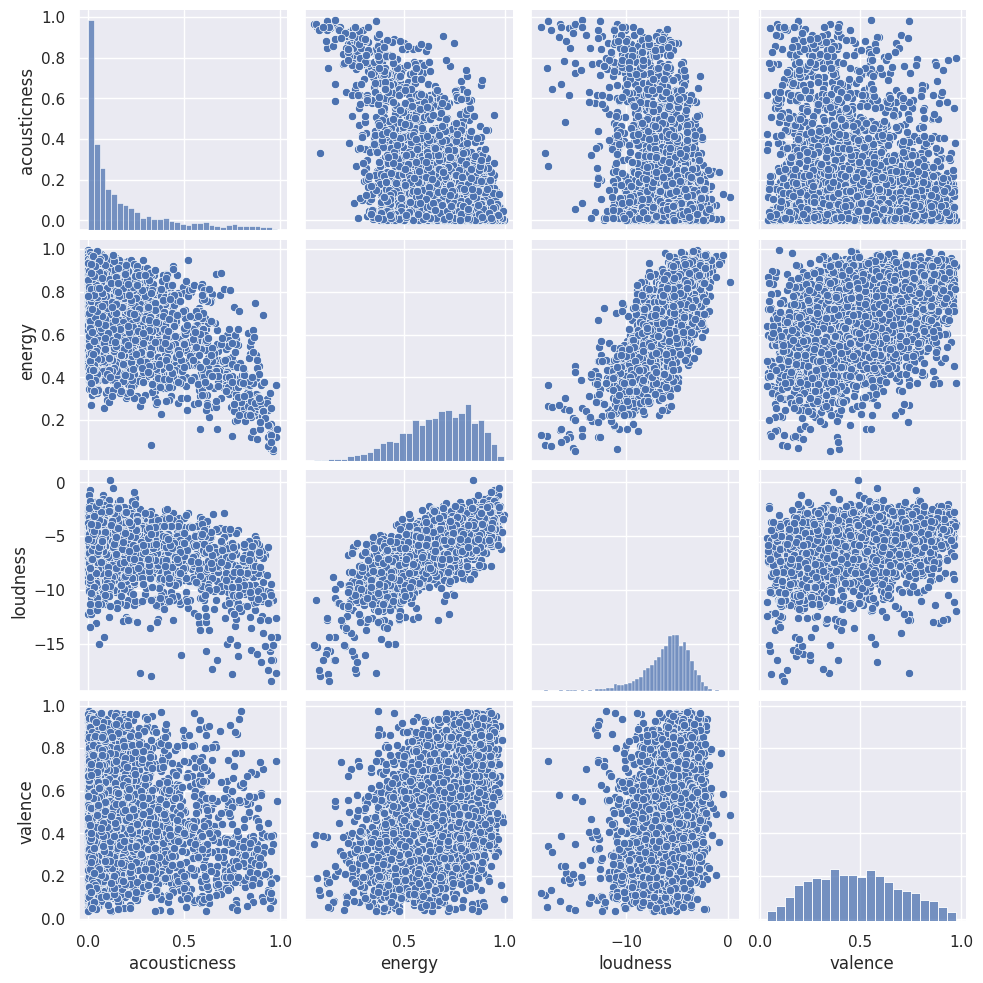

In [47]:
plt.figure(figsize = (10,10))
sns.pairplot(train[['acousticness', 'energy', 'loudness', 'valence']])

## Pre-Learning

In [72]:
tree = DecisionTreeRegressor()
tree.fit(X_train[features_numeric], y_train)

for (feature, importance) in zip(tree.feature_names_in_, tree.feature_importances_):
  print(f'{importance:.03f} {feature}')

0.572 weeks_on_chart
0.199 lowest_position
0.022 spotify_track_duration_ms
0.019 danceability
0.018 energy
0.014 key
0.017 loudness
0.003 mode
0.025 speechiness
0.029 acousticness
0.010 instrumentalness
0.019 liveness
0.024 valence
0.023 tempo
0.004 time_signature


In [70]:
tree.score(X_test[features_numeric], y_test)

0.47345177110875447

## Learning